# Bibliothèques

In [1]:
import os
import os.path
os.chdir("C:/Users/maell/Fake_News_Project")

import urllib.request
import zipfile

import pandas as pd
import numpy as np
import community

from scipy import *

from itertools import combinations

import matplotlib.pyplot as plt

import networkx as nx


# 1. _GRAPH SUR UNE JOURNEE_


# Récupération des fichiers qui nous interressent

In [2]:
##################################
# Fonctions utiles
##################################

def filtrer(src, dst):
    date = ['20180930'] #30 septembre 2017
    
    for line in src:
        if 'mentions.CSV' not in line:
            continue
        arr = line.split(' ')
        for time in date:
            if time in arr[2]:
                dst.write(arr[0]+' '+arr[1]+' '+arr[2])


def dezip(filezip, pathdst = ''): 
    if pathdst == '': pathdst = os.getcwd()  ## on dezippe dans le repertoire locale 
    zfile = zipfile.ZipFile(filezip, 'r') 
    for i in zfile.namelist():  ## On parcourt l'ensemble des fichiers de l'archive 
        print (i) 
        if os.path.isdir(i):   ## S'il s'agit d'un repertoire, on se contente de creer le dossier 
            try: os.makedirs(pathdst + os.sep + i) 
            except: pass 
        else: 
            try: os.makedirs(pathdst + os.sep + os.path.dirname(i)) 
            except: pass 
            data = zfile.read(i)                   ## lecture du fichier compresse 
            fp = open(pathdst + os.sep + i, "wb")  ## creation en local du nouveau fichier 
            fp.write(data)                         ## ajout des donnees du fichier compresse dans le fichier local 
            fp.close() 
    zfile.close() 
                
###############################################################################################
# Création du fichier contenant uniquement les liens des fichier mentions qui nous interressent
###############################################################################################

source = open("masterfilelist.txt", "r") # Ouverture du fichier source
destination = open("data_list.csv", "w") # Ouverture du fichier destination
filtrer(source, destination) # Filtrage
destination.close()# Fermeture du fichier destination
source.close()# Fermerture du fichier source
                    
################################
# Récupération des fichiers csv
################################

#enregistrement fichier csv
master_data = pd.read_csv('data_list.csv',sep= ' ',header = None,engine='python')
master_data.columns = ['1','2','url']

#suppression lignes inutiles
for index, row in master_data.iterrows():
    if '.mentions.CSV' not in row['url']:
        master_data = master_data.drop(index)

# vide le dossier où stocker les donnees
for element in os.listdir("C:/Users/maell/Fake_News_Project/data_folder"):
    path="C:/Users/maell/Fake_News_Project/data_folder/"+element
    os.remove(path)
        
#telecharge et dezippe les fichiers depuis le web
for index, row in master_data.iterrows():
    element = row['url']
    urllib.request.urlretrieve(element,'file')
    dezip('file', 'data_folder')
    
print("FIN")

20180930000000.mentions.CSV
20180930001500.mentions.CSV
20180930003000.mentions.CSV
20180930004500.mentions.CSV
20180930010000.mentions.CSV
20180930011500.mentions.CSV
20180930013000.mentions.CSV
20180930014500.mentions.CSV
20180930020000.mentions.CSV
20180930021500.mentions.CSV
20180930023000.mentions.CSV
20180930024500.mentions.CSV
20180930030000.mentions.CSV
20180930031500.mentions.CSV
20180930033000.mentions.CSV
20180930034500.mentions.CSV
20180930040000.mentions.CSV
20180930041500.mentions.CSV
20180930043000.mentions.CSV
20180930044500.mentions.CSV
20180930050000.mentions.CSV
20180930051500.mentions.CSV
20180930053000.mentions.CSV
20180930054500.mentions.CSV
20180930060000.mentions.CSV
20180930061500.mentions.CSV
20180930063000.mentions.CSV
20180930064500.mentions.CSV
20180930070000.mentions.CSV
20180930071500.mentions.CSV
20180930073000.mentions.CSV
20180930074500.mentions.CSV
20180930080000.mentions.CSV
20180930081500.mentions.CSV
20180930083000.mentions.CSV
20180930084500.menti

# Création du DataFrame complet (pour la journée)

In [6]:
########################
# Fonction Utile
########################
def open_data(fichier):
    data=pd.read_csv(fichier,sep="\t",header=None)
    column_names=['GlobalEventID','EventTimeDate','MentionTimeDate','MentionType','MentionSourceName','MentionIdentifier','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','InRawText','Confidence','MentionDocLen','MentionDocTone','MentionDocTranslationInfo','Extras']
    data.columns=column_names
    return data

################################
# Création du DataFrame Complet
################################
column_names=['GlobalEventID','EventTimeDate','MentionTimeDate','MentionType','MentionSourceName','MentionIdentifier','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','InRawText','Confidence','MentionDocLen','MentionDocTone','MentionDocTranslationInfo','Extras']
all_data=pd.DataFrame({'GlobalEventID':[],'EventTimeDate':[],'MentionTimeDate':[],'MentionType':[],'MentionSourceName':[],'MentionIdentifier':[],'SentenceID':[],'Actor1CharOffset':[],'Actor2CharOffset':[],'ActionCharOffset':[],'InRawText':[],'Confidence':[],'MentionDocLen':[],'MentionDocTone':[],'MentionDocTranslationInfo':[],'Extras':[]},
                      columns = column_names,
                      index=[])
                       
for fichier in os.listdir("C:/Users/maell/Fake_News_Project/data_folder"):
    path_fichier="C:/Users/maell/Fake_News_Project/data_folder/"+fichier
    new_data=open_data(path_fichier)
    all_data = pd.concat([all_data,new_data],ignore_index = True)
    print("OK - "+fichier)
print("FIN")
                       
#################################
# Sauvegarde du fichier all_data.csv
#################################
all_data.to_csv('all_data.csv', sep='\t', decimal= '.')

OK - 20180930000000.mentions.CSV
OK - 20180930001500.mentions.CSV
OK - 20180930003000.mentions.CSV
OK - 20180930004500.mentions.CSV
OK - 20180930010000.mentions.CSV
OK - 20180930011500.mentions.CSV
OK - 20180930013000.mentions.CSV
OK - 20180930014500.mentions.CSV
OK - 20180930020000.mentions.CSV
OK - 20180930021500.mentions.CSV
OK - 20180930023000.mentions.CSV
OK - 20180930024500.mentions.CSV
OK - 20180930030000.mentions.CSV
OK - 20180930031500.mentions.CSV
OK - 20180930033000.mentions.CSV
OK - 20180930034500.mentions.CSV
OK - 20180930040000.mentions.CSV
OK - 20180930041500.mentions.CSV
OK - 20180930043000.mentions.CSV
OK - 20180930044500.mentions.CSV
OK - 20180930050000.mentions.CSV
OK - 20180930051500.mentions.CSV
OK - 20180930053000.mentions.CSV
OK - 20180930054500.mentions.CSV
OK - 20180930060000.mentions.CSV
OK - 20180930061500.mentions.CSV
OK - 20180930063000.mentions.CSV
OK - 20180930064500.mentions.CSV
OK - 20180930070000.mentions.CSV
OK - 20180930071500.mentions.CSV
OK - 20180

In [8]:
##################################
# Ouverture du fichier all_data.csv
##################################
all_data = pd.read_csv('all_data.csv',sep = '\t',decimal = '.',index_col=0)

# Visualisation du DataFrame
all_data.head()

,GlobalEventID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,790922550.0,2.018093e+13,2.018093e+13,1.0,nzherald.co.nz,https://www.nzherald.co.nz/technology/news/art...,11.0,-1.0,2710.0,2718.0,0.0,20.0,5656.0,0.000000,NaN,NaN
1,693966425.0,2.017093e+13,2.018093e+13,1.0,nzherald.co.nz,https://www.nzherald.co.nz/technology/news/art...,11.0,-1.0,2710.0,2718.0,1.0,80.0,5656.0,0.000000,NaN,NaN
2,790922551.0,2.018093e+13,2.018093e+13,1.0,syracuse.com,https://www.syracuse.com/us-news/index.ssf/201...,10.0,-1.0,1960.0,2070.0,1.0,20.0,2233.0,-6.878307,NaN,NaN
3,790922552.0,2.018093e+13,2.018093e+13,1.0,ktop1490.com,http://www.ktop1490.com/news/meet-the-hurrican...,4.0,-1.0,712.0,676.0,0.0,20.0,4741.0,-0.719424,NaN,NaN
4,790922552.0,2.018093e+13,2.018093e+13,1.0,z937.com,http://www.z937.com/news/meet-the-hurricane-co...,4.0,-1.0,712.0,676.0,0.0,20.0,4741.0,-0.719424,NaN,NaN


# Etude des événements de la journée

In [5]:
#######################
# Fonction Utile
#######################

def open_data(fichier):
    data=pd.read_csv(fichier,sep="\t",header=None)
    column_names=['GlobalEventID','EventTimeDate','MentionTimeDate','MentionType','MentionSourceName','MentionIdentifier','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','InRawText','Confidence','MentionDocLen','MentionDocTone','MentionDocTranslationInfo','Extras']
    data.columns=column_names
    return data

############################
# Extraction des événements
############################

#Création du DataFrame tab_event
tab_event=pd.DataFrame(columns=['GlobalEventID','NumberMention']) 

#On compte
for event in all_data.GlobalEventID.unique():
    mentions_event=all_data[all_data["GlobalEventID"]==event]
    row=[]
    row.append({'GlobalEventID':event, 'NumberMention':len(mentions_event)})
    tab_event=tab_event.append(row, ignore_index=True)
    
######################################################
# Classement du DataFrame du plus cité au moins cité
######################################################
tab_event=tab_event.sort_values(by = 'NumberMention', ascending = False)
tab_event=tab_event.reset_index(drop=True)
tab_event

#####################
# Sauvegarde
#####################
tab_event.to_csv('tab_event.csv', sep='\t', decimal= '.')


In [13]:
test=all_data['GlobalEventID'].value_counts()
type(test)

pandas.core.series.Series

In [9]:
#####################
# Récupération
#####################
tab_event = pd.read_csv('tab_event.csv',sep = '\t',decimal = '.',index_col=0)

###################
# Affichage
###################
tab_event

,GlobalEventID,NumberMention
0,790924547.0,1148
1,790924437.0,1075
2,790924573.0,945
3,790926222.0,685
4,790923878.0,498
5,790924450.0,494
6,790923195.0,470
7,790926347.0,468
8,790924695.0,462
9,790928743.0,446


<IPython.core.display.Javascript object>


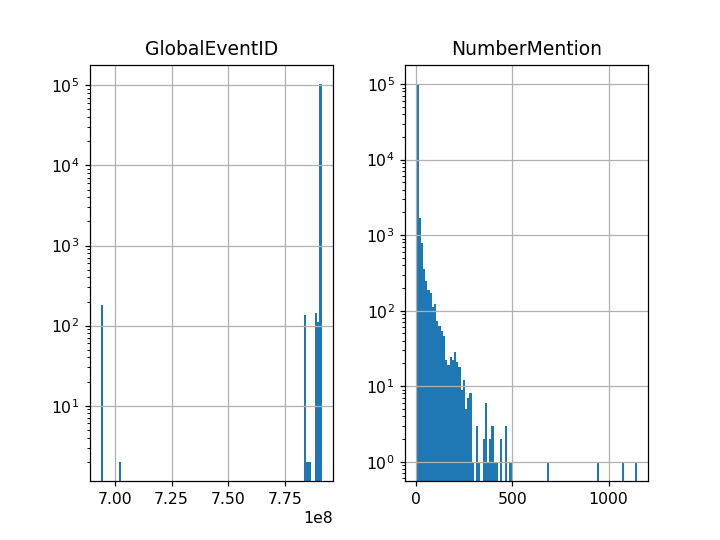

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B602EE898>,
      dtype=object)

In [90]:
%matplotlib notebook
tab_event.hist(bins=100, log=True)

# Création du Graph
nodes = sources  \  edges = common event

In [57]:
G.clear()

In [58]:
##################
# Fonction utile
##################

#Création d'un graph binaire 
def graph_sources(data,G):
    for source in data.MentionSourceName.unique():
        G.add_node(source)
    for event in data.GlobalEventID.unique():
        list_source=data[data.GlobalEventID==event].MentionSourceName
        for source1 in list_source:
            for source2 in list_source:
                if source1!=source2:
                    G.add_edge(source1,source2)

#Création d'un graph avec comme poids le nombre d'évenements partagés
def graph_sources_poids(data,G):
    for source in data.MentionSourceName.unique():
        G.add_node(source)
    for event in data.GlobalEventID.unique():
        liste_source=data[data.GlobalEventID==event].MentionSourceName
        for comb in combinations(liste_source,2):
            if comb[0]!=comb[1]:
                if G.has_edge(comb[0],comb[1]):
                    G[comb[0]][comb[1]]['weight'] += 1
                else:
                    G.add_edge(comb[0], comb[1], weight=1)
                    
################################
# Création du graph
################################

G=nx.Graph()
graph_sources_poids(all_data,G)
print("OK")

OK


# Traitement du Graph

In [7]:
# Sauvegarde Grephi
nx.write_gexf(G,'graph_journee_.gexf')

In [63]:
###########################################################
# Suivi d'évenements
###########################################################

evenements_a_suivre=[791045470.0, 790928951.0, 791072761.0,791074306.0]

n=0
for event in evenements_a_suivre:
    lignes=all_data[all_data["GlobalEventID"]==event]
    for source in lignes.MentionSourceName:
        G.node[source]['evenement']=n
    n=n+1

In [64]:
# Casser les liens trop faibles (<10 partages)

edges_to_remove = []
for edge in G.edges():
    if G[edge[0]][edge[1]]['weight']<10:
        edges_to_remove.append(edge)

G.remove_edges_from(edges_to_remove)

# Suppression des éléments non connectés
composants=list(nx.connected_components(G))
i=0;
while i<len(composants):
    if len(composants[i])==1:
        composant_supp=list(composants[i])[0]
        G.remove_node(composant_supp)
    i=i+1

In [8]:
nx.get_node_attributes(G,'evenement')

{'charlotteobserver.com': 1,
 'foxbaltimore.com': 0,
 'local15tv.com': 1,
 'wach.com': 1,
 'khqa.com': 1,
 'wtov9.com': 0,
 'abc7amarillo.com': 0,
 'fredericknewspost.com': 1,
 'jerseyeveningpost.com': 1,
 'koamtv.com': 0,
 'indianexpress.com': 1,
 'globalnews.ca': 0,
 'independent.ie': 1,
 'chicagotribune.com': 1,
 'fox11online.com': 1,
 'poststar.com': 2,
 'dailymail.co.uk': 2,
 'the-messenger.com': 0,
 'tribtown.com': 2,
 '1063word.com': 1,
 'mcall.com': 1,
 'wect.com': 0,
 'kansas.com': 0,
 'omaha.com': 0,
 '590kid.com': 1,
 'yourbasin.com': 2,
 'bostonglobe.com': 2,
 'gulfnews.com': 1,
 'yahoo.com': 2,
 'fox13now.com': 2,
 'reuters.com': 2,
 'cbc.ca': 2,
 'ctvnews.ca': 1,
 'montrealgazette.com': 2,
 'channelnewsasia.com': 2,
 'sandiegouniontribune.com': 1,
 'latimes.com': 1,
 'nydailynews.com': 2,
 'savannahnow.com': 1,
 'wbay.com': 1,
 'seattlepi.com': 2,
 'theindependent.com': 0,
 'houstonchronicle.com': 0,
 'wflx.com': 1,
 'mysanantonio.com': 2,
 'startribune.com': 0,
 'lmtonli

In [65]:
# Partition
partition = community.best_partition(G)

print ("Partitions found: ", len(set(partition.values())))
for i in set(partition.values()):
    members = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print (i, len(members))
    
nx.set_node_attributes(G,partition,'partition')

Partitions found:  56
0 499
1 162
2 551
3 309
4 647
5 227
6 2
7 77
8 256
9 50
10 14
11 33
12 2
13 124
14 17
15 2
16 116
17 2
18 3
19 2
20 3
21 2
22 7
23 2
24 2
25 2
26 4
27 2
28 2
29 2
30 2
31 2
32 3
33 11
34 3
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 3
46 7
47 3
48 2
49 2
50 2
51 4
52 2
53 2
54 2
55 2


In [66]:
# Sauvegarde Grephi
nx.write_gexf(G,'graph_journee_event_20180930_propre_2.gexf')

# Analyse du Graph

In [47]:
# Liste des nodes dans communautés 
print("List of nodes in the community :")
for item in set(partition.items()):
    if item[1]==13:
        print(item[0])

List of nodes in the community :
manningrivertimes.com.au
lithgowmercury.com.au
tenterfieldstar.com.au
theislanderonline.com.au
donnybrookmail.com.au
bunburymail.com.au
hawkesburygazette.com.au
crookwellgazette.com.au
youngwitness.com.au
mailtimes.com.au
edenmagnet.com.au
gloucesteradvocate.com.au
forbesadvocate.com.au
theaustralian.com.au
camdenadvertiser.com.au
westernmagazine.com.au
westcoastsentinel.com.au
irrigator.com.au
westernadvocate.com.au
hardenexpress.com.au
wollondillyadvertiser.com.au
nynganobserver.com.au
yasstribune.com.au
hepburnadvocate.com.au
bendigoadvertiser.com.au
nvi.com.au
goondiwindiargus.com.au
areanews.com.au
sbs.com.au
murrayvalleystandard.com.au
naroomanewsonline.com.au
portlincolntimes.com.au
standard.net.au
theflindersnews.com.au
guyraargus.com.au
sconeadvocate.com.au
grenfellrecord.com.au
dailyadvertiser.com.au
fairfieldchampion.com.au
singletonargus.com.au
bellingencourier.com.au
macleayargus.com.au
theherald.com.au
juneesoutherncross.com.au
whyallanews

In [80]:
all_data[all_data["GlobalEventID"]==791074306.0].MentionIdentifier[373594]

'https://www.binghamtonhomepage.com/news/politics/canada-us-make-progress-in-trade-talks-but-no-deal-yet/1487920727'

# Réduction du centre du Graph

On utilise l'histogramme de mention des evenements pour selectionner ceux qui nous interressent i.e. un intervalle assez "central"

In [124]:
#############################
# Définition de l'intervalle
#############################
min_mention=70
max_mention=360

###########################
# Selection des evenements
###########################
evenements_reduction=tab_event[tab_event["NumberMention"]>min_mention] # and tab_event["NumberMention"]<min_mention]
evenements_reduction=evenements_reduction[evenements_reduction["NumberMention"]<max_mention]
# VOIR COMMENT FAIRE EN UNE SEULE LIGNE

###########################
# Labelisation des noeuds
##########################
for event in evenements_reduction.GlobalEventID:
    lignes=all_data[all_data["GlobalEventID"]==event]
    for source in lignes.MentionSourceName:
        if source in G.node():
            G.remove_node(source)

In [125]:
#####################
# Sauvegarde Grephi
#####################
nx.write_gexf(G,'graph_journee_reduit.gexf')